#Customer Segmentation
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

Dataset Information:
The online_retail.csv contains 541909 rows and 8 columns

1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#creating dataframe for the given csv file

In [2]:
data=pd.read_csv('OnlineRetail.csv',encoding='latin1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
#Data frame Description
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [4]:
# Checking the presence of null values in the dataset

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# Calculating the Missing Values % contribution in Datafrome

df_null = round(100*(data.isnull().sum())/len(data), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
#Dropping the null values as their percentage of presence is very less

In [8]:
data.dropna(inplace=True)

In [9]:
#checking null values after dropping them.

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
data.shape

(406829, 8)

In [13]:
#Checking the datatypes of the attributes
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Data Preparation:

In [14]:
#we will segregate the customers based on the following factors:

#R (Recency): Number of days since last purchase
#F (Frequency): Number of tracsactions
#M (Monetary): Total amount of transactions


In [15]:
# creating new attribute Amount to find the Total amount of transactions
data['Amount'] = data['Quantity']*data['UnitPrice']

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [47]:
data_m = data.groupby('CustomerID')['Amount'].sum()
data_m.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [48]:
data_m=data_m.reset_index()
data_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [35]:
# Creating new attribute: Frequency of transactions done by customer
data_f = data.groupby('CustomerID')['InvoiceNo'].count()

In [40]:
data_f=data_f.reset_index()

In [41]:
data_f.columns=['CustomerID','Frequency']

In [42]:
data_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [49]:
data_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
#Merging the two dataframes, data_m, data_f 

In [51]:
data_mf=pd.merge(data_m,data_f,on='CustomerID',how='inner')
data_mf.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
#New Attribute: Recency (No of days since last purchage)
# Converting InvoiceDate from Object data type to Datetime 

In [52]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [53]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [54]:
# Finding the maximum date to know the last transaction date

max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [55]:
# Calculating the difference between max date and transaction date

data['Diff'] = max_date - data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [56]:
# Finding last transaction date to get the recency of customers

data_r = data.groupby('CustomerID')['Diff'].min()
data_r = data_r.reset_index()
data_r.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [57]:
# Extracting only number of days from the diff attribute 

data_r['Diff'] = data_r['Diff'].dt.days
data_r.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [58]:
# Merging tha dataframes data_mf,data_r to get the final RFM dataframe

data_rfm = pd.merge(data_mf, data_r, on='CustomerID', how='inner')

In [59]:
data_rfm.head()

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [60]:
data_rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
data_rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [61]:
data_rfm.describe()

,CustomerID,Amount,Frequency,Recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,93.053294,91.047118
std,1722.390705,8219.345141,232.471608,100.765435
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13812.750000,293.362500,17.000000,16.000000
50%,15300.500000,648.075000,42.000000,49.000000
75%,16778.250000,1611.725000,102.000000,142.000000
max,18287.000000,279489.020000,7983.000000,373.000000


Text(0.5, 0, 'Attributes')

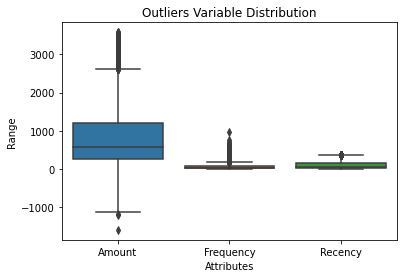

In [105]:
# Outlier Analysis for data_rfm

attributes = ['Amount','Frequency','Recency']
#plt.figure(figsize=(9,7))
sns.boxplot(data = data_rfm[attributes])
plt.title("Outliers Variable Distribution", fontsize = 12)
plt.ylabel("Range")
plt.xlabel("Attributes")

In [ ]:
#from above we have outliers for Amount attribute that should be removed

In [67]:
Q1 = data_rfm.Amount.quantile(0.25)
Q3 = data_rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
print("Q1=",Q1,"\nQ3=",Q3,"\nIQR=",IQR)

Q1= 293.3625 
Q3= 1611.725 
IQR= 1318.3625


In [69]:
data_rfm = data_rfm[(data_rfm.Amount >= Q1 - 1.5*IQR) & (data_rfm.Amount <= Q3 + 1.5*IQR)]

In [70]:
data_rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


In [ ]:
#Rescaling the attributes by standardizing like mean=0 and sd=1

In [71]:
data_scaled=data_rfm[['Amount', 'Frequency', 'Recency']]

In [74]:
scaled = StandardScaler()

In [76]:
data_df_scaled = scaled.fit_transform(data_scaled)#mean= 0 and sd=1
data_df_scaled

array([[-1.05074746, -0.77729595,  2.21073646],
       [ 1.15760351, -0.40113457, -0.23875936],
       [ 1.1088346 ,  0.14365087, -0.78526042],
       ...,
       [-0.83375097, -0.63461405, -0.89260884],
       [ 1.52332739,  9.00289992, -0.93164463],
       [ 1.20680249,  0.10473763, -0.55104568]])

In [77]:
data_df_scaled = pd.DataFrame(data_df_scaled)
data_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
data_df_scaled.head()

,Amount,Frequency,Recency
0,-1.050747,-0.777296,2.210736
1,1.157604,-0.401135,-0.238759
2,1.108835,0.143651,-0.785260
3,-0.639855,-0.582730,2.054593
4,0.848168,0.429015,-0.619358


# Building the Model

In [ ]:
# Here we are using K-Means clustering as we need to find the group of customers who are segmented 
#depending on their purchasing behaviour

In [78]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_df_scaled)

KMeans(n_clusters=4)

In [79]:
 # to Find the k means labels
kmeans.labels_

array([1, 2, 2, ..., 0, 3, 2])

Elbow curve Method to find the correct number of clusters.

In [ ]:
#WCSS is the sum of squared distance between each point and the centroid in a cluster.

In [80]:
wcss = []
range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8]# number of clusters
for n in range_n_clusters:  # n=3
    kmeans = KMeans(n_clusters=n)  # KMEans(n=3)
    kmeans.fit(data_df_scaled)
    wcss.append(kmeans.inertia_)
wcss

[6989.636199244621,
 4225.392379686447,
 3191.4061396619472,
 2622.252387585681,
 2269.035484762785,
 1968.8687517235626,
 1768.5721569045627]

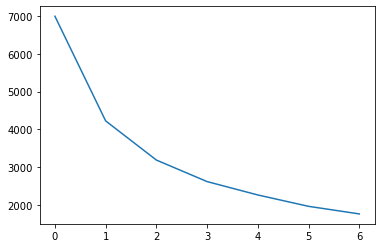

In [81]:
plt.plot(wcss)

so from above Elbow curve method the number of clusters should be 3

In [82]:
#Now we will calculate Kmeans with clusters=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_df_scaled)

KMeans(n_clusters=3)

In [83]:
 kmeans.labels_

array([2, 0, 1, ..., 0, 1, 1])

In [84]:
data_df_scaled

,Amount,Frequency,Recency
0,-1.050747,-0.777296,2.210736
1,1.157604,-0.401135,-0.238759
2,1.108835,0.143651,-0.785260
3,-0.639855,-0.582730,2.054593
4,0.848168,0.429015,-0.619358
...,...,...,...
3944,-0.828836,-0.673527,1.742307
3945,-0.951440,-0.712441,0.795689
3946,-0.833751,-0.634614,-0.892609
3947,1.523327,9.002900,-0.931645


In [85]:
data_rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35


In [87]:
#adding clusterId to the data
data_rfm['ClusterID']=kmeans.labels_
data_rfm.head()


,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,1


In [ ]:
#visualizing the clusterid with frequency

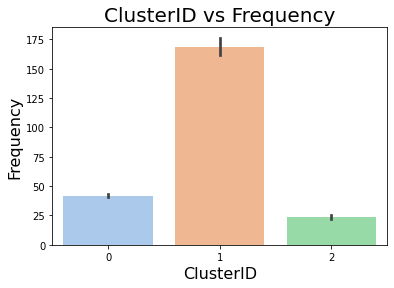

In [100]:
x=data_rfm['ClusterID']
y=data_rfm['Frequency']
sns.barplot(x,y,palette='pastel')
plt.title('ClusterID vs Frequency', fontsize=20)
plt.xlabel('ClusterID', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

In [ ]:
#visualize ClusterID Vs Amount

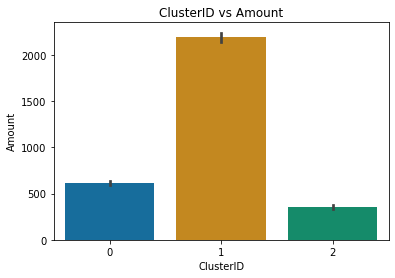

In [103]:
x=data_rfm['ClusterID']
y=data_rfm['Amount']
sns.barplot(x,y,palette='colorblind')
plt.title('ClusterID vs Amount')
plt.xlabel('ClusterID')
plt.ylabel('Amount')
plt.show()

In [ ]:
#visualize ClusterID Vs Recency

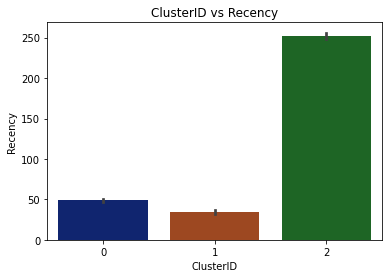

In [104]:
x=data_rfm['ClusterID']
y=data_rfm['Recency']
sns.barplot(x,y,palette='dark')
plt.title('ClusterID vs Recency')
plt.xlabel('ClusterID')
plt.ylabel('Recency')
plt.show()

Inference:
Customers of Cluster 1 are most frequent buyers business needs to give importance to these customers to improve their sales
Customers of Cluster 2 did most recent transactions where as 
Customers with Cluster Id 0 are not recent buyers and hence least of importance from business point of view.